# Logistic Regression for Predicting Diabetes

Diabetes is a chronic (long-lasting) health condition that affects how the body turns food into energy, according to the Centers for Disease Control and Prevention (CDC). This dataset consists of the following variables: pregnancy, glucose, blood pressure, skin thickness, insulin, BMI, diabetes pedigree function, and age, which are relevant in making predictions.

Logistic regression is a machine learning classification algorithm that predicts the likelihood of a categorical dependent variable. In this scenario, it's employed to make diabetes predictions.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [2]:
df = pd.read_csv("Healthcare-Diabetes.csv")

View the first five rows

In [3]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#checking the shape 
df.shape

(2768, 10)

In [5]:
#checking each column information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


In [6]:
#checking for null values
df.isnull().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#checking for NaN values
df.isna().sum()

Id                          0
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
#dropping the ID column
df.drop(columns = ["Id"], inplace = True)

In [9]:
#checking for duplicates
df.duplicated().sum()

1990

***Insights:*** All variables are numeric and there are no missing values, there are also lots of duplicates in the dataset

In [10]:
#dropping the duplicates and checking the shape
df2 = df.drop_duplicates(keep="first")
df2.shape

(778, 9)

Descriptive Statistics

In [11]:
#descriptive statistics of the dataset
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,778.0,3.821337,3.360794,0.000,1.000,3.0000,6.00000,17.00
Glucose,778.0,121.199229,31.990831,0.000,99.000,117.0000,141.00000,199.00
BloodPressure,778.0,68.975578,19.471675,0.000,62.000,72.0000,80.00000,122.00
SkinThickness,778.0,20.763496,16.329714,0.000,0.000,23.0000,32.00000,110.00
Insulin,778.0,80.388175,115.113501,0.000,0.000,36.0000,130.00000,846.00
BMI,778.0,32.185476,8.215687,0.000,27.325,32.2500,36.77500,80.60
DiabetesPedigreeFunction,778.0,0.471861,0.330180,0.078,0.244,0.3745,0.62675,2.42
Age,778.0,33.347044,11.789024,21.000,24.000,29.0000,41.00000,81.00
Outcome,778.0,0.349614,0.477155,0.000,0.000,0.0000,1.00000,1.00


***Insights:*** The columns (Glucose,BloodPressure,SkinThickness,Insulin,BMI) contain 0 which is most likely not possible. These values would be replaced with each columns median

In [12]:
#checking the zero counts in the columns
cols = ["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]
print(df2[cols].isin([0]).sum())

Glucose            5
BloodPressure     36
SkinThickness    229
Insulin          377
BMI               11
dtype: int64


In [13]:
#replacing zero with each columns median value
for col in cols:
    df2[col] = df2[col].replace(0, df2[col].median())

In [14]:
#checking the outcome counts
df2["Outcome"].value_counts()

Outcome
0    506
1    272
Name: count, dtype: int64

***Insights:*** There are 272 patients with diabetes and 506 without diabetes, this shows an imbalanced dataset

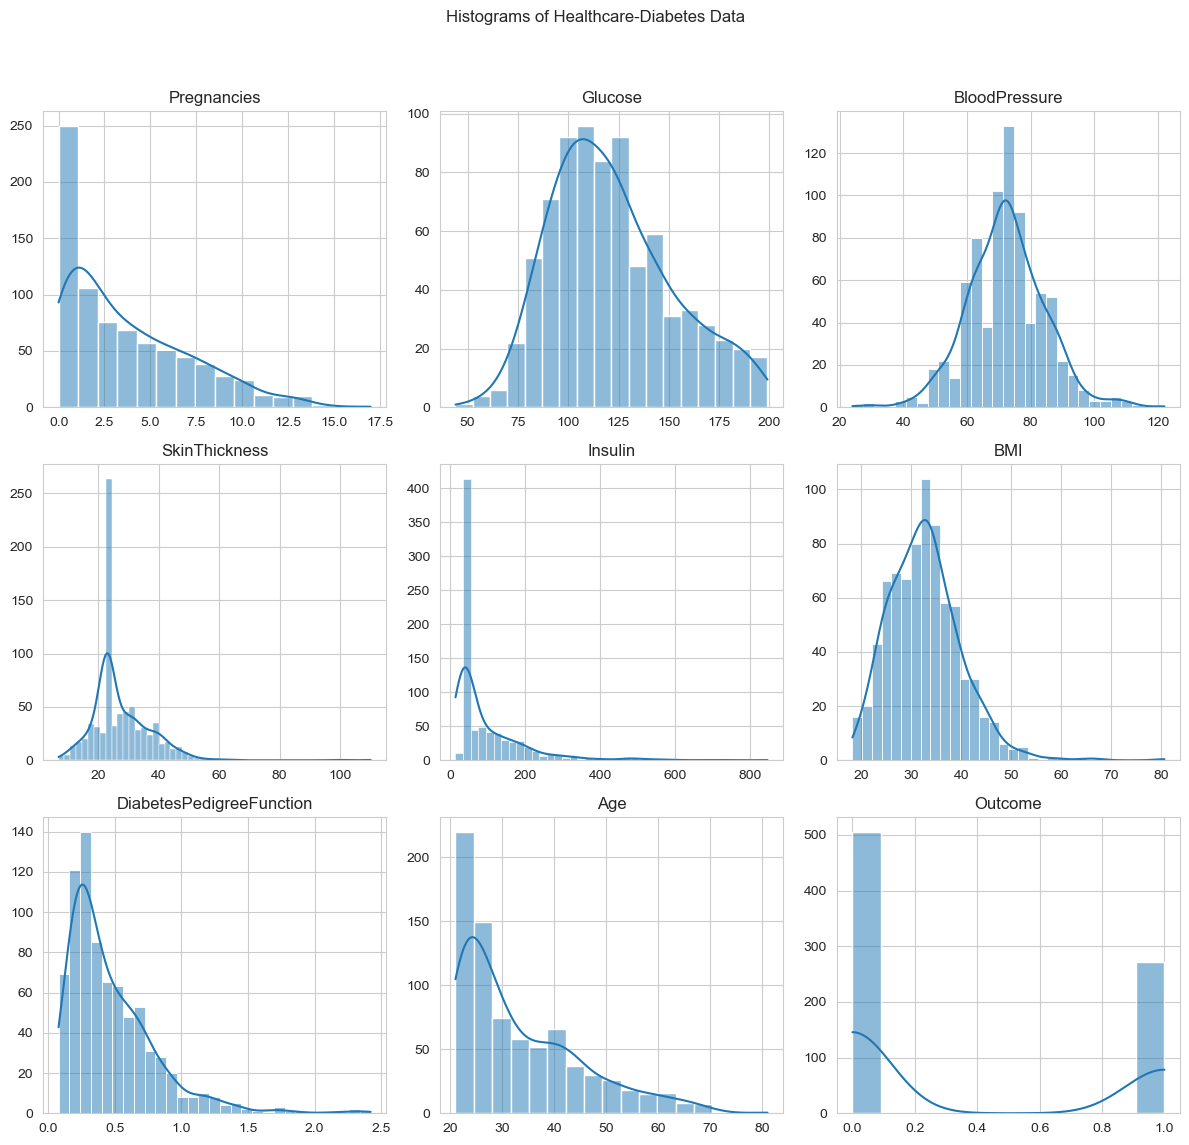

In [15]:
#plotting the histogram for each column
sns.set_style("whitegrid")

fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize=(12,12))
fig.suptitle("Histograms of Healthcare-Diabetes Data")

cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
for i, col in enumerate(cols):
    sns.histplot(df2[col], kde=True, ax=axes[i//3, i%3])
    axes[i//3, i%3].set_title(col)
    axes[i//3, i%3].set_xlabel("")
    axes[i//3, i%3].set_ylabel("")

plt.tight_layout(rect=[0,0.03,1,0.95])
plt.show()

***Insights:*** The histograms provide insights into the distribution of each variable.
Pregnancies : The count of most pregnancies are on the lower end.
Age: Most individuals are young. The long tail extending towards higher ages indicates there are also older indivuals

In [16]:
#checking the relationship between variables
df2.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.123444,0.212669,0.021751,-0.055212,0.013958,-0.034159,0.532993,0.220380
Glucose,0.123444,1.000000,0.206846,0.178940,0.363661,0.241408,0.137331,0.265746,0.484675
BloodPressure,0.212669,0.206846,1.000000,0.145601,-0.024324,0.243600,0.001201,0.324093,0.172797
SkinThickness,0.021751,0.178940,0.145601,1.000000,0.240776,0.505274,0.140445,0.059776,0.181061
Insulin,-0.055212,0.363661,-0.024324,0.240776,1.000000,0.185675,0.181305,-0.006498,0.148594
BMI,0.013958,0.241408,0.243600,0.505274,0.185675,1.000000,0.140307,0.033427,0.277718
DiabetesPedigreeFunction,-0.034159,0.137331,0.001201,0.140445,0.181305,0.140307,1.000000,0.034839,0.172160
Age,0.532993,0.265746,0.324093,0.059776,-0.006498,0.033427,0.034839,1.000000,0.244260
Outcome,0.220380,0.484675,0.172797,0.181061,0.148594,0.277718,0.172160,0.244260,1.000000


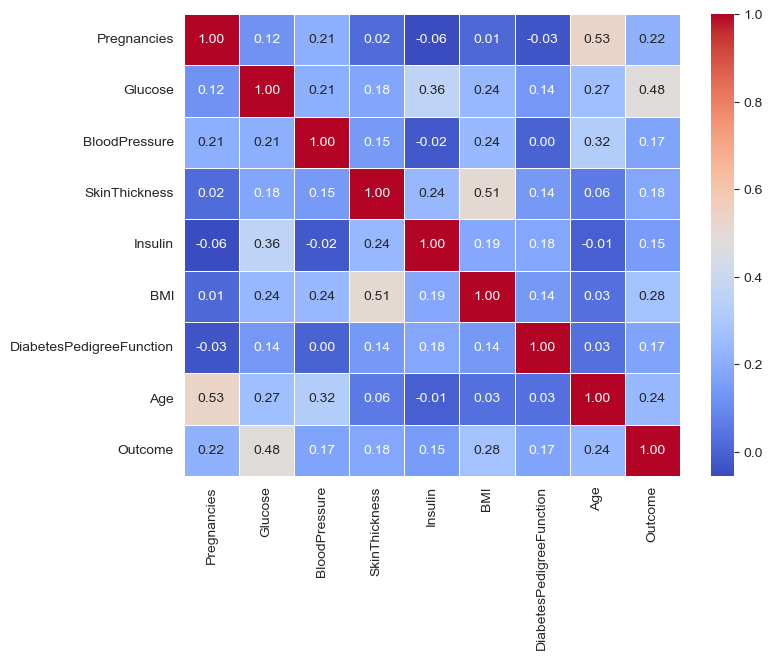

In [17]:
#plotting a heatmap showing the correlation between variables
correlation_matrix = df2.corr()
plt.figure(figsize = (8,6))
sns.heatmap(correlation_matrix,annot = True, cmap = "coolwarm", fmt = ".2f", linewidths = 0.5)
plt.show()


***Insights:*** The correlation heatmap matrix shows the correlation between multiple variables, it provides quantified insights into how each variable is related to others.
Glucose has the strongest correlation with outcome amongst all other variables

In [18]:
#spliting the data into train 
train,test = train_test_split(df2,test_size =0.2, random_state = 42)
#checking the value counts for outcome
train["Outcome"].value_counts()

Outcome
0    396
1    226
Name: count, dtype: int64

In [19]:
#dropping the outcome column
X_train = train.drop("Outcome",axis=1)
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
694,2,90,60,23,36,23.5,0.191,25
638,7,97,76,32,91,40.9,0.871,32
133,8,84,74,31,36,38.3,0.457,39
355,9,165,88,23,36,30.4,0.302,49
55,1,73,50,10,36,23.0,0.248,21
...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26
106,1,96,122,23,36,22.4,0.207,27
270,10,101,86,37,36,45.6,1.136,38
435,0,141,72,23,36,42.4,0.205,29


In [20]:
#naming the y_train
y_train= train.Outcome

In [21]:
#dropping the outcome column
X_test = test.drop("Outcome", axis=1)

In [22]:
#naming the y_test 
y_test = test.Outcome

In [23]:
model = LogisticRegression()
model

LogisticRegression()

In [24]:
model.fit(X_train,y_train)

LogisticRegression()

In [25]:
pred = model.predict(X_test)

In [26]:
#checking the accuracy score
model.score(X_test,y_test)

0.7628205128205128

***Insights:*** Accuracy score of the model is 0.76 (76%)

In [27]:
#summary of the model's performance
cm = confusion_matrix(y_test, pred)
cm

array([[89, 21],
       [16, 30]], dtype=int64)

***Insights:*** 
True Negative- 89,
True Positive- 30,
False Positive-21,
False Negative-16.

In [28]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       110
           1       0.59      0.65      0.62        46

    accuracy                           0.76       156
   macro avg       0.72      0.73      0.72       156
weighted avg       0.77      0.76      0.77       156



# Logistic Regression Using Statsmodel

In [29]:
import statsmodels.api as sm
import pandas as pd

In [31]:
de = df2

In [32]:
de.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,36,33.6,0.627,50,1
1,1,85,66,29,36,26.6,0.351,31,0


In [36]:
Xtrain = de.drop("Outcome", axis=1)
ytrain = de.Outcome

In [40]:
log_reg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.589936
         Iterations 5


In [42]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  622
Model:                          Logit   Df Residuals:                      614
Method:                           MLE   Df Model:                            7
Date:                Wed, 28 Feb 2024   Pseudo R-squ.:                 0.09977
Time:                        16:16:10   Log-Likelihood:                -366.94
converged:                       True   LL-Null:                       -407.61
Covariance Type:            nonrobust   LLR p-value:                 7.358e-15
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1180      0.033      3.627      0.000       0.054       0.182
Glucose                      0.0205      0.003      5.922      0.000       0.014       0.

In [46]:
yhat = log_reg.predict(X_test)
prediction = list(map(round,yhat))


In [48]:
print("Actual Values:", list(y_test.values))
print("Predictions:", prediction)

Actual Values: [1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
Predictions: [0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0]


In [49]:
cm = confusion_matrix(y_test, prediction)
cm

array([[90, 20],
       [27, 19]], dtype=int64)

In [50]:
accuracy_score(y_test,prediction)

0.6987179487179487